# Classification Of Brain Tumors - Data Preprocessing & Test Data Creation

This notebook is the 3rd Step in creating a working model for Brain Tumor Classification Problem and lists down the following:

1. Preprocess the data so that all the images of data set have a consistent image size.
2. Divide the data into Training and Test sets.

## Step-1: Loading the data and enquiring about the shape of the data

In [36]:
#load required python packages
import os
import shutil
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
%matplotlib inline

In [2]:
#Print the current working directory
path = os.getcwd()
print(path)

d:\Learning\Springboard\GitHub\Classification-Brain-Tumors


In [3]:
#Create 2 new Path variables so that they point to 'Train' and 'Test' Directories
train_path = os.path.join(path,'Train')
test_path = os.path.join(path,'Test')

In [4]:
#Reading Images & Loading the image data from /Train/Yes and Train/No folders in a list

#Create an Empty list to store image data
load_data = list()

#load all images in Yes Directory
for fn in listdir(os.path.join(train_path,'Yes')):
    #Load the Image in a variable
    img_data = Image.open(os.path.join(train_path,'Yes',fn))
    #Append the loaded image to the list created
    height, width, layers = list(np.asarray(img_data).shape)
    form = img_data.format
    mode = img_data.mode
    load_data.append([fn, height, width, str(layers), form, mode])

#load all images in No Directory
for fn in listdir(os.path.join(train_path,'No')):
    #Load the Image in a variable
    img_data = Image.open(os.path.join(train_path,'No',fn))
    #Append the loaded image to the list created
    height, width, layers = list(np.asarray(img_data).shape)
    form = img_data.format
    mode = img_data.mode
    load_data.append([fn, height, width, str(layers), form, mode])
    

In [5]:
#Creating a Dataframe from the above list
df = pd.DataFrame(load_data, columns = ['img_name', 'height','width','layers','format','mode'])

#Make image_name as the index of the dataframe
df.set_index('img_name', inplace = True)
df.head(5)

,height,width,layers,format,mode
img_name,,,,,
Y_1.JPG,619,495,3,JPEG,RGB
Y_10.JPG,500,455,3,JPEG,RGB
Y_100.JPG,225,225,3,JPEG,RGB
Y_1000.JPG,512,512,3,JPEG,RGB
Y_1001.JPG,512,512,3,JPEG,RGB


In [7]:
#Describing the data
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
height,3525,NaN,NaN,NaN,463.11,133.629,167,431,512,512,1446
width,3525,NaN,NaN,NaN,457.957,140.776,150,417,512,512,1375
layers,3525,1,3,3525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
format,3525,1,JPEG,3525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mode,3525,1,RGB,3525,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Thus, from above it looks like all the images:

1. Have 3 layers.
2. Have the same format JPEG.
3. Have the same mode RGB.
4. Have varying sizes.
5. Minimum sized image has dimensions: (150,167)
6. Maximum sized image has dimensions: (1375,1446)

## Step-2: Resize all the images to a common size of (150,150)

In [9]:
IMAGE_SIZE = (150,150)
#load all images in Yes Directory
for fn in listdir(os.path.join(train_path,'Yes')):
    #Load the Image in a variable
    img_data = Image.open(os.path.join(train_path,'Yes',fn))
    #Resize the image
    new_img = img_data.resize(IMAGE_SIZE)
    os.remove(os.path.join(train_path,'Yes',fn))
    new_img.save(os.path.join(train_path,'Yes',fn))

#load all images in No Directory
for fn in listdir(os.path.join(train_path,'No')):
    #Load the Image in a variable
    img_data = Image.open(os.path.join(train_path,'No',fn))
    #Resize the image
    new_img = img_data.resize(IMAGE_SIZE)
    os.remove(os.path.join(train_path,'No',fn))
    new_img.save(os.path.join(train_path,'No',fn))

### Verify that all the images have been resized to dimensions(150,150)

In [10]:
#Reading Images & Loading the image data from /Train/Yes and Train/No folders in a list

#Create an Empty list to store image data
load_data = list()

#load all images in Yes Directory
for fn in listdir(os.path.join(train_path,'Yes')):
    #Load the Image in a variable
    img_data = Image.open(os.path.join(train_path,'Yes',fn))
    #Append the loaded image to the list created
    height, width, layers = list(np.asarray(img_data).shape)
    form = img_data.format
    mode = img_data.mode
    load_data.append([fn, height, width, str(layers), form, mode])

#load all images in No Directory
for fn in listdir(os.path.join(train_path,'No')):
    #Load the Image in a variable
    img_data = Image.open(os.path.join(train_path,'No',fn))
    #Append the loaded image to the list created
    height, width, layers = list(np.asarray(img_data).shape)
    form = img_data.format
    mode = img_data.mode
    load_data.append([fn, height, width, str(layers), form, mode])

In [11]:
#Creating a Dataframe from the above list
df_new = pd.DataFrame(load_data, columns = ['img_name', 'height','width','layers','format','mode'])

#Make image_name as the index of the dataframe
df_new.set_index('img_name', inplace = True)
#Describing the data
df_new.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
height,3525,NaN,NaN,NaN,150,0,150,150,150,150,150
width,3525,NaN,NaN,NaN,150,0,150,150,150,150,150
layers,3525,1,3,3525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
format,3525,1,JPEG,3525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mode,3525,1,RGB,3525,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### It can be seen that all the images have been resized to dimensions: (150,150)

## Step-3: Visualize some data from the Dataset.

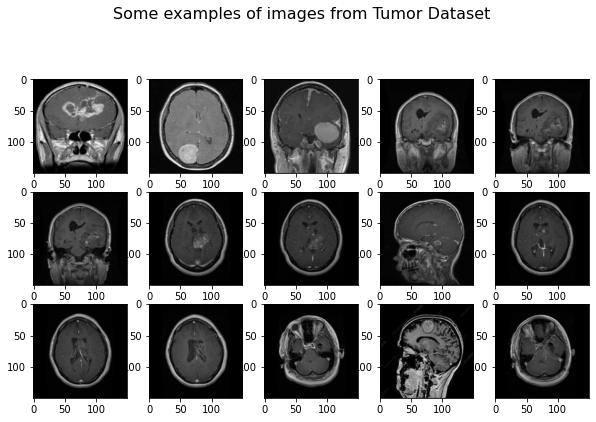

In [18]:
count = 0
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images from Tumor Dataset", fontsize=16)
for fn in listdir(os.path.join(train_path,'Yes')):    
    if(count < 15):
        plt.subplot(5,5,count+1)
        img_data = Image.open(os.path.join(train_path,'Yes',fn))
        plt.imshow(img_data)
    count +=1

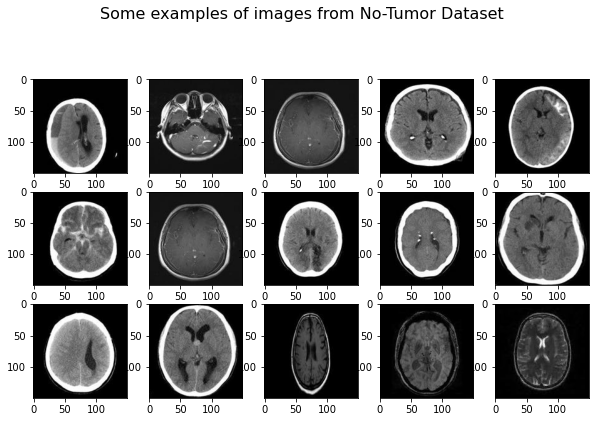

In [19]:
count = 0
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images from No-Tumor Dataset", fontsize=16)
for fn in listdir(os.path.join(train_path,'No')):
    if(count < 15):
        plt.subplot(5,5,count+1)
        img_data = Image.open(os.path.join(train_path,'No',fn))
        plt.imshow(img_data)
    count +=1

## Step-4: Split the Dataset to Train and Test Set

In [22]:
#Total images in Train\Yes folder
yes = len(listdir(os.path.join(train_path,'Yes')))
print(yes)
#Total images in Train\No folder
no = len(listdir(os.path.join(train_path,'No')))
print(no)

2929
596


### Let's divide the train-test data in 80-20 ratio.

In [24]:
test_yes = yes * 0.2
test_no = no * 0.2
print(int(test_yes))
print(int(test_no))

585
119


### Hence, we need to randomly move 585 images from Train\Yes folder to Test\Yes folder and 119 images from Train\No folder to Test\No folder

In [48]:
#import random number generator to generate random numbers to be moved to Test set
import random
randomlist_yes=[]
count = 0
# Create a list of non-repeating 585 numbers for which images will be moved to Test set
while (count < 585):
    r = random.randint(1,2930)
    if r not in randomlist_yes:
        randomlist_yes.append(r)
        count += 1

In [49]:
randomlist_no=[]
count = 0
# Create a list of non-repeating 119 numbers for which images will be moved to Test set
while (count < 119):
    r = random.randint(1,596)
    if r not in randomlist_no:
        randomlist_no.append(r)
        count += 1

In [50]:
randomlist_yes = ['Y_' + str(lst) + '.JPG' for lst in randomlist_yes]
randomlist_no = ['N_' + str(lst) + '.JPG' for lst in randomlist_no]

In [51]:
# Moving the images assigned to above generated numbers from Train set to Test set
for fl in randomlist_yes:
    shutil.move(os.path.join(train_path,'Yes',fl), os.path.join(test_path,'Yes'))
for fl in randomlist_no:
    shutil.move(os.path.join(train_path,'No',fl), os.path.join(test_path,'No'))

### Verify that the data has been moved to respective folders

In [53]:
#Total images in Train\Yes folder
yes = len(listdir(os.path.join(train_path,'Yes')))
print("Train Yes: " + str(yes))
#Total images in Train\No folder
no = len(listdir(os.path.join(train_path,'No')))
print("Train No: " + str(no))
#Total images in Test\Yes folder
yes = len(listdir(os.path.join(test_path,'Yes')))
print("Test Yes: " + str(yes))
#Total images in Test\No folder
no = len(listdir(os.path.join(test_path,'No')))
print("Test No: " + str(no))

Train Yes: 2344
Train No: 477
Test Yes: 585
Test No: 119


## At this point the dataset has been Preprocessed and divided in Train and Test Sets ans is ready to be used for Modeling.